<div align="center"><h1> Data Science Project </h1></div>
<div align="center"><h2> Classification of assertions according to their veracity values ( automatic fact-checking ) </h2></div>
<h2>Group member</h2>
<ul>
    <li>Meriem AMERAOUI</li>
    <li>Dounia BELABIOD</li>
    <li>Jihene BOUHLEL</li>
    <li>Bahaa Eddine NIL</li>
</ul>

<div class="alert alert-block alert-info" align="center">
    <h1>
        Basics
    </h1>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reding data
def read_data(*args, **kwargs):
    data = kwargs.get("data", 'test')
    number = kwargs.get("number", 1000)
    labels = ["ID", "Text", "Date", "TruthRating", "RatingName", "Author", "Headline", 
              "NamedEntitiesClaim", "NamedEntitiesArticle", "Keywords", "Source", "SourceURL", "Link", "Language"]
    
    if(data not in ['all', 'polsno', 'test']):
        print('Please selecte somthing in [\'all\', \'polsno\', \'test\']')
    else:
        test = pd.read_csv('datasets/test.csv', sep = ',', names = labels, skiprows = 1)
        pol1 = pd.read_csv('datasets/pol1.csv', sep = ',', names = labels, skiprows = 1)
        pol2 = pd.read_csv('datasets/pol2.csv', sep = ',', names = labels, skiprows = 1)
        sno1 = pd.read_csv('datasets/sno1.csv', sep = ',', names = labels, skiprows = 1)
        sno2 = pd.read_csv('datasets/sno2.csv', sep = ',', names = labels, skiprows = 1)
        reste = pd.read_csv('datasets/reste.csv', sep = ',', names = labels, skiprows = 1)

        pol = pol1.append(pol2, sort = False).reset_index(drop = True)
        sno = sno1.append(sno2, sort = False).reset_index(drop = True)
        polsno = pol.append(sno, sort = False).reset_index(drop = True)
        everything = polsno.append(reste, sort = False).reset_index(drop = True)
        
        if(data == 'polsno'):
            if(number > polsno.shape[0]):
                print(f'Not enough data !\nReading only {polsno.shape[0]} claims')
                number = polsno.shape[0]
            else:
                print(f'Reading successfully {number} claims')
            df_func = polsno.sample(n = number).reset_index(drop = True)

        if(data == 'all'):
            if(number > everything.shape[0]):
                print(f'Not enough data !\nReading only {everything.shape[0]} claims')
                number = everything.shape[0]
            else:
                print(f'Reading successfully {number} claims')
            df_func = everything.sample(n = number).reset_index(drop = True)

        if(data == 'test'):
            if(number > test.shape[0]):
                print(f'Not enough data !\nReading only {test.shape[0]} claims')
                number = test.shape[0]
            else:
                print(f'Reading successfully {number} claims')
            df_func = test.sample(n = number).reset_index(drop = True)
        
        for column in df_func.columns:
            if(column == 'RatingName'):
                df_func[column].replace(to_replace = True, value = 'TRUE', inplace = True)
                df_func[column].replace(to_replace = False, value = 'FALSE', inplace = True)
        
        df_func.to_csv('datasets/generated.csv', sep = ';', index = False)
        print(f'\nFile \'generated.csv\' created !'
              '\nYou can found this csv in the following path datasets/generated.csv')

        return df_func

<div class="alert alert-block alert-info" align="center">
    <h1>
        Generating & saving data
    </h1>
</div>

<h2>read_data(data='test', number = '1000')</h2>
<ul>
    <li><b>data</b></li>
	<ul>
		<li>'all' for all website</li>
		<li>'polsno' for politifact's and snopes' claims </li>
		<li>'test' for csv test (all sites) with 10000 claims max</li>
	</ul>
        <li><b>number</b></li>
	<ul>
		<li>number of claims to generate</li>
	</ul>
</ul>

In [2]:
df = read_data(data = 'test', number = 1000)

Reading successfully 1000 claims

File 'generated.csv' created !
You can found this csv in the following path datasets/generated.csv


<div class="alert alert-block alert-info" align="center">
    <h1>
        Printing informations
    </h1>
</div>

## Shape

In [3]:
print(f'Shape :\n{df.shape}')

Shape :
(1000, 14)


## Informations

In [4]:
print(f'Informations :')
df.info()

Informations :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
ID                      1000 non-null object
Text                    1000 non-null object
Date                    1000 non-null object
TruthRating             1000 non-null int64
RatingName              1000 non-null object
Author                  1000 non-null object
Headline                987 non-null object
NamedEntitiesClaim      983 non-null object
NamedEntitiesArticle    638 non-null object
Keywords                871 non-null object
Source                  1000 non-null object
SourceURL               1000 non-null object
Link                    1000 non-null object
Language                1000 non-null object
dtypes: int64(1), object(13)
memory usage: 109.5+ KB


## Description

In [5]:
print(f'Description :')
display(df.describe())

Description :


,TruthRating
count,1000.000000
mean,1.253000
std,1.218391
min,-1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,3.000000


## Printing some lines

In [6]:
print(f'Printing some lines :')
display(df.head())

Printing some lines :


,ID,Text,Date,TruthRating,RatingName,Author,Headline,NamedEntitiesClaim,NamedEntitiesArticle,Keywords,Source,SourceURL,Link,Language
0,http://data.gesis.org/claimskg/claim_review/d1...,'Obamacare will provide coverage for abortions...,2012-09-11,2,MIXTURE,Karen Handel,"Karen Handel lays out case against Obama, othe...","Barack Obama,Ben Nelson,Cecile Richards,Erin S...",Obamacare,Abortion,politifact,http://www.politifact.com,http://www.politifact.com/georgia/statements/2...,English
1,http://data.gesis.org/claimskg/claim_review/0a...,The briefcase retrieved by Vincent Vega and Ju...,Unknown,1,FALSE,Unknown,What’s in the ‘Pulp Fiction’ Briefcase?,"I can’t believe,Kiss Me Deadly,Marsellus Walla...","Jules Winnfield,Marsellus Wallace,Pulp Fiction...","Films, Movies, pulp fiction, quentin tarantino",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/whats-in-the...,English
2,http://data.gesis.org/claimskg/claim_review/19...,"'The best estimate is that 200,000 people in W...",2017-05-31,2,MIXTURE,Hillary Clinton,Hillary Clinton's Mostly False claim on photo ...,"2016 presidential election,Barack Obama,Democr...",2016 presidential election,"Civil Rights,Driver's licenses,Elections,Gover...",politifact,http://www.politifact.com,http://www.politifact.com/wisconsin/statements...,English
3,http://data.gesis.org/claimskg/claim_review/63...,Internet celebrity 'Damn Daniel' was mugged an...,Unknown,1,FALSE,Unknown,Internet Celebrity Daniel Lara Wasn’t Mugged f...,"Damn Daniel,Daniel Lara,Pancho Villa,eBay,fake...","Damn Daniel,Internet celebrity","damn daniel, fake news",snopes,http://www.snopes.com,https://www.snopes.com/fact-check/daniel-lara-...,English
4,http://data.gesis.org/claimskg/claim_review/bd...,In a budget deal struck in 2011 'a trillion do...,2013-02-21,2,MIXTURE,Bill Nelson,Sen. Bill Nelson says 2011 budget deal include...,"Bill Nelson,Budget Control Act of 2011,Central...",NaN,"Debt,Deficit,Federal Budget",politifact,http://www.politifact.com,http://www.politifact.com/truth-o-meter/statem...,English


## Display of information on all columns

In [7]:
for column in df.columns:
      print(f'Nombre de valeurs nulles pour {column} :\n{df[column].isnull().value_counts()}\n')

Nombre de valeurs nulles pour ID :
False    1000
Name: ID, dtype: int64

Nombre de valeurs nulles pour Text :
False    1000
Name: Text, dtype: int64

Nombre de valeurs nulles pour Date :
False    1000
Name: Date, dtype: int64

Nombre de valeurs nulles pour TruthRating :
False    1000
Name: TruthRating, dtype: int64

Nombre de valeurs nulles pour RatingName :
False    1000
Name: RatingName, dtype: int64

Nombre de valeurs nulles pour Author :
False    1000
Name: Author, dtype: int64

Nombre de valeurs nulles pour Headline :
False    987
True      13
Name: Headline, dtype: int64

Nombre de valeurs nulles pour NamedEntitiesClaim :
False    983
True      17
Name: NamedEntitiesClaim, dtype: int64

Nombre de valeurs nulles pour NamedEntitiesArticle :
False    638
True     362
Name: NamedEntitiesArticle, dtype: int64

Nombre de valeurs nulles pour Keywords :
False    871
True     129
Name: Keywords, dtype: int64

Nombre de valeurs nulles pour Source :
False    1000
Name: Source, dtype: int64


## Display of empty columns

In [8]:
array = []
for column in df.columns:
    value = False
    value = df[column].isnull().any()
    if value:
        array.append(column)
print(f'Nombre de colonnes vides : {len(array)}\nLes colonnes vide sont :\n{array}')

Nombre de colonnes vides : 4
Les colonnes vide sont :
['Headline', 'NamedEntitiesClaim', 'NamedEntitiesArticle', 'Keywords']


## Description of each column

In [9]:
for column in df.columns:
    display(df[column].describe())

count                                                  1000
unique                                                  999
top       http://data.gesis.org/claimskg/claim_review/d8...
freq                                                      2
Name: ID, dtype: object

count                                                  1000
unique                                                 1000
top       A man soared three miles above Los Angeles in ...
freq                                                      1
Name: Text, dtype: object

count        1000
unique        471
top       Unknown
freq          484
Name: Date, dtype: object

count    1000.000000
mean        1.253000
std         1.218391
min        -1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         3.000000
Name: TruthRating, dtype: float64

count      1000
unique        4
top       FALSE
freq        380
Name: RatingName, dtype: object

count        1000
unique        351
top       Unknown
freq          493
Name: Author, dtype: object

count                                                   987
unique                                                  987
top       Did ‘Nazis’ Tape an Antifa Member to a Utility...
freq                                                      1
Name: Headline, dtype: object

count                                                   983
unique                                                  983
top       Gloucester Citizen,Royal Mail,Stuart Whitman,T...
freq                                                      1
Name: NamedEntitiesClaim, dtype: object

count              638
unique             579
top       Donald Trump
freq                 8
Name: NamedEntitiesArticle, dtype: object

count             871
unique            636
top       ASP Article
freq               51
Name: Keywords, dtype: object

count           1000
unique             9
top       politifact
freq             488
Name: Source, dtype: object

count                          1000
unique                            9
top       http://www.politifact.com
freq                            488
Name: SourceURL, dtype: object

count                                                  1000
unique                                                  999
top       https://fullfact.org/economy/has-gig-economy-d...
freq                                                      2
Name: Link, dtype: object

count        1000
unique          1
top       English
freq         1000
Name: Language, dtype: object

## Get a series of unique values in each column of the dataframe

In [10]:
for column in df.columns:
    uniqueValues = df[column].unique()
    print(f'Number of unique elements in column {column} : {len(uniqueValues)}, values & type :\n{uniqueValues}\n')

Number of unique elements in column ID : 999, values & type :
['http://data.gesis.org/claimskg/claim_review/d1bd5074-2c9c-5c28-ab39-d6aeabd2046b'
 'http://data.gesis.org/claimskg/claim_review/0ab07cba-8a59-5f31-858c-08019141fb7f'
 'http://data.gesis.org/claimskg/claim_review/19433fe3-a5a0-58ea-8fe9-4dd9737ca215'
 'http://data.gesis.org/claimskg/claim_review/63aeab9c-ac3f-5cf3-ac99-6742c9678496'
 'http://data.gesis.org/claimskg/claim_review/bd8b49bc-0963-5221-9f50-a4b6a3ff62ab'
 'http://data.gesis.org/claimskg/claim_review/80a84d89-2971-59bd-9769-33d5d6623e19'
 'http://data.gesis.org/claimskg/claim_review/66925b98-c3d5-57fa-a131-280b0985c75c'
 'http://data.gesis.org/claimskg/claim_review/67f5e64d-74c4-5dbb-989c-f0dc16e2bba2'
 'http://data.gesis.org/claimskg/claim_review/79e8c95c-4c47-58dd-ac19-ce4b8b3332d8'
 'http://data.gesis.org/claimskg/claim_review/cabbd3f0-182f-53ae-b104-7a76ba6ad6b1'
 'http://data.gesis.org/claimskg/claim_review/3bf6fff3-cfac-563e-9c0d-397322a9fd61'
 'http://data.

## Display number of different TruthRating

In [11]:
print(f'La colonne TruthRating contient :')
print(f'{df[df["TruthRating"]==-1]["ID"].count()} Other')
print(f'{df[df["TruthRating"]==1]["ID"].count()} False')
print(f'{df[df["TruthRating"]==2]["ID"].count()} Mixture')
print(f'{df[df["TruthRating"]==3]["ID"].count()} True')

La colonne TruthRating contient :
169 Other
380 False
311 Mixture
140 True


<div class="alert alert-block alert-info" align="center">
    <h1>
        Visualization
    </h1>
</div>

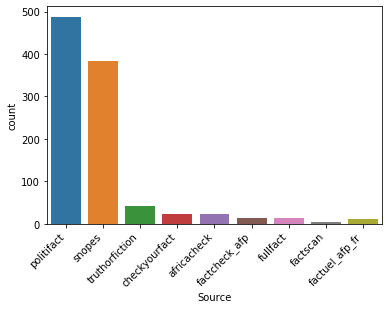

In [12]:
chart = sns.countplot(x = 'Source', data = df)
plt.setp(chart.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.show()

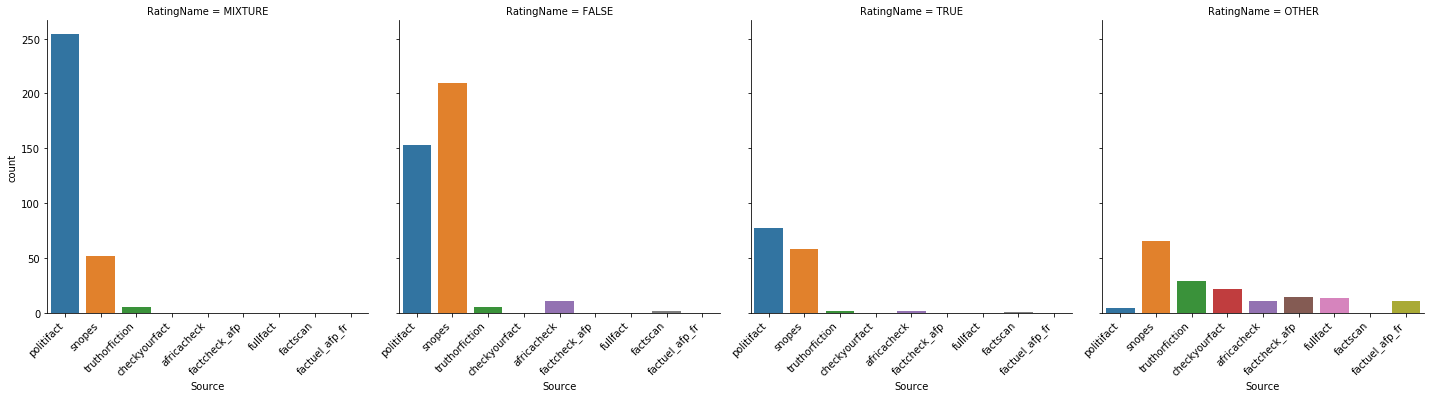

In [13]:
chart = sns.catplot(x = 'Source', col = 'RatingName', kind = 'count', data = df)
for ax in chart.axes.ravel():
    plt.setp(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.show()

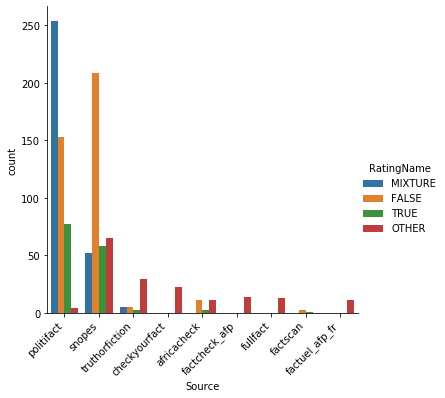

In [14]:
chart = sns.catplot('Source', data = df, hue = 'RatingName', kind = 'count')
for ax in chart.axes.ravel():
    plt.setp(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.show()

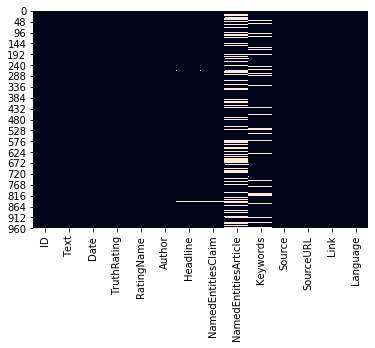

In [15]:
sns.heatmap(df.isnull(), cbar = False)
plt.show()